In [1]:
"""
overlap-save frequency domain GSC
refer to
    Efficient frequency-domain realization of robust generalized, sidelobe cancellers
Author:
    Wang Wei
"""
import argparse
from time import time

import numpy as np
from scipy.signal import windows
from scipy.signal import convolve as conv

from DistantSpeech.adaptivefilter.FastFreqLms import FastFreqLms
from DistantSpeech.beamformer.MicArray import MicArray
from DistantSpeech.beamformer.beamformer import beamformer
from DistantSpeech.beamformer.utils import load_audio as audioread
from DistantSpeech.beamformer.utils import save_audio as audiowrite
from DistantSpeech.beamformer.utils import visual
from DistantSpeech.transform.transform import Transform
from DistantSpeech.noise_estimation import McSpp
from DistantSpeech.beamformer.FDGSC import FDGSC, DelayObj
from DistantSpeech.beamformer.TDGSC import TDGSC

import librosa
import matplotlib.pyplot as plt
from DistantSpeech.transform.transform import Transform
from DistantSpeech.beamformer.utils import pmesh, mesh, load_wav, save_audio, load_pcm, pt
from DistantSpeech.beamformer.utils import load_audio as audioread
from DistantSpeech.beamformer.utils import save_audio as audiowrite
from DistantSpeech.beamformer.beamformer import beamformer
from DistantSpeech.beamformer.MicArray import MicArray, compute_tau
from DistantSpeech.noise_estimation import McSpp

from pesq import pesq
from pystoi.stoi import stoi

In [2]:

mic_diameter = 0.032
sound_speed = 343
look_direction = 197

fs = 16000
M = 4
mic_array = MicArray(arrayType="circular", r=mic_diameter, M=M, n_fft=512)
print(mic_array.mic_loc)

array_data = []
for n in range(2,6):
    filename = '/home/wangwei/work/DistantSpeech/samples/audio_samples/xmos/rec1/音轨-{}.wav'.format(n)
    data_ch = audioread(filename)
    array_data.append(data_ch)
array_data = np.array(array_data)
print(array_data.shape)


[[ 3.20000000e-02  0.00000000e+00  0.00000000e+00]
 [ 1.95943488e-18  3.20000000e-02  0.00000000e+00]
 [-3.20000000e-02  3.91886976e-18  0.00000000e+00]
 [-5.87830464e-18 -3.20000000e-02  0.00000000e+00]]
(4, 427680)


/home/wangwei/work/DistantSpeech/DistantSpeech/beamformer/utils.py:183: WavFileWarning: Chunk (non-data) not understood, skipping it.
  _, audio_data = wavfile.read(filename)


tau:[[ 8.92179364e-05]
 [ 2.72766605e-05]
 [-8.92179364e-05]
 [-2.72766605e-05]]
delay_samples:[-0.          0.99106041  2.85497397  1.86391355]
self.delay_filter:(84, 4)
(513, 835, 1)


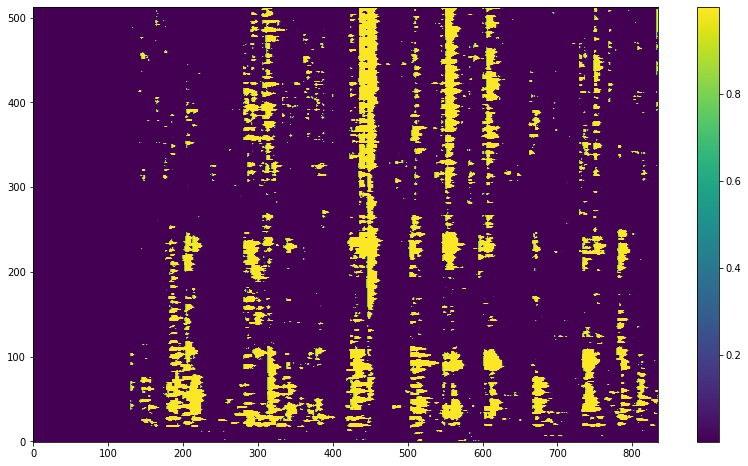

(427680,)


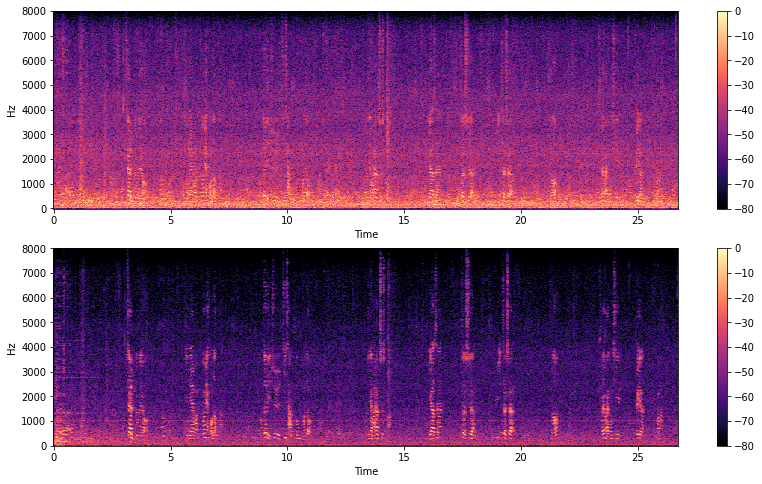

In [3]:
frameLen = 512
# hop = frameLen / 2
# overlap = frameLen - hop
# nfft = frameLen*2
# c = 340
# r = 0.032
# fs = 16000

# start = tim


# start = time()

tdgsc = TDGSC(mic_array, frameLen=frameLen, angle=[look_direction, 0])
yout, G = tdgsc.process(array_data.T, postfilter=True)
pmesh(G)
print(yout.shape)

# audiowrite('wav/out_aic.wav', yout)

# end = time()
# print(end - start)

visual(array_data[0, :], yout)



In [4]:
audiowrite('array_data_0.wav',array_data[0, :])
audiowrite('out_aic.wav', yout)

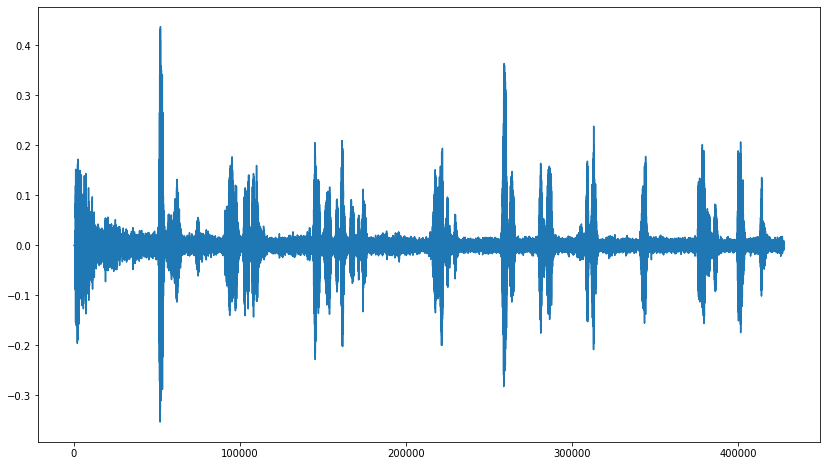

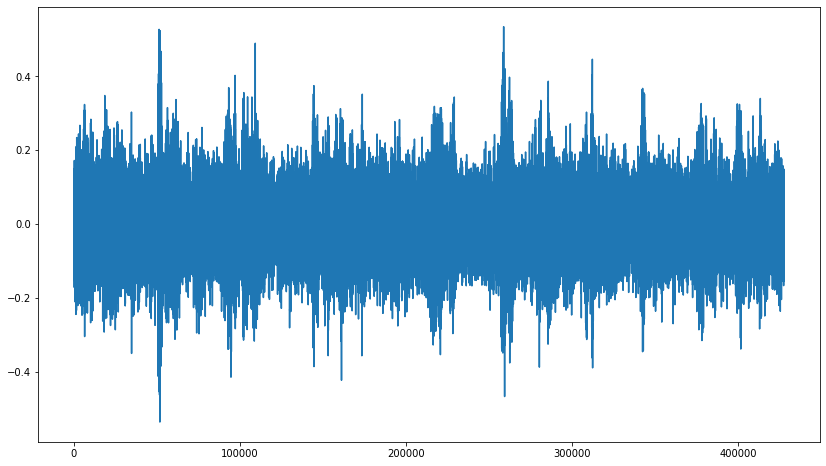

In [5]:
plt.figure(figsize=(14,8))
plt.plot(yout)
plt.show()

plt.figure(figsize=(14,8))
plt.plot(array_data[0])
plt.show()